# MRT data example

We continue the MRT example from last lecture, but using bagging.  

First, import some packages and functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
import datetime
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree)
from sklearn.ensemble import \
    (RandomForestRegressor as RF,
     GradientBoostingRegressor as GBR)

Read in MRT data to a pandas data frame, create a date index

In [4]:
MRT = pd.read_csv('MRT.csv',names=["Ridership"],header=0)
MRT_date=pd.date_range(start=datetime.datetime(2019,1,1),periods=48,freq="MS")
MRT.set_index(MRT_date,inplace=True)
MRT.head()

,Ridership
2019-01-01,3462
2019-02-01,3248
2019-03-01,3383
2019-04-01,3400
2019-05-01,3359


Insert a new variable in the data frame, months since January 2019

In [5]:
MRT.insert(0,"Months",np.arange(0,48))
MRT.head()

,Months,Ridership
2019-01-01,0,3462
2019-02-01,1,3248
2019-03-01,2,3383
2019-04-01,3,3400
2019-05-01,4,3359


Extract features and response (the second set of brackets in the index for X forces the column to be extracted 
as a data frame rather than a pandas series).

In [6]:
feature_names=list(MRT.columns)
X=MRT[['Months']]
y=MRT['Ridership']

Train and plot the tree.  We will just look at the tree without pruning, since this is what we use in bagging.

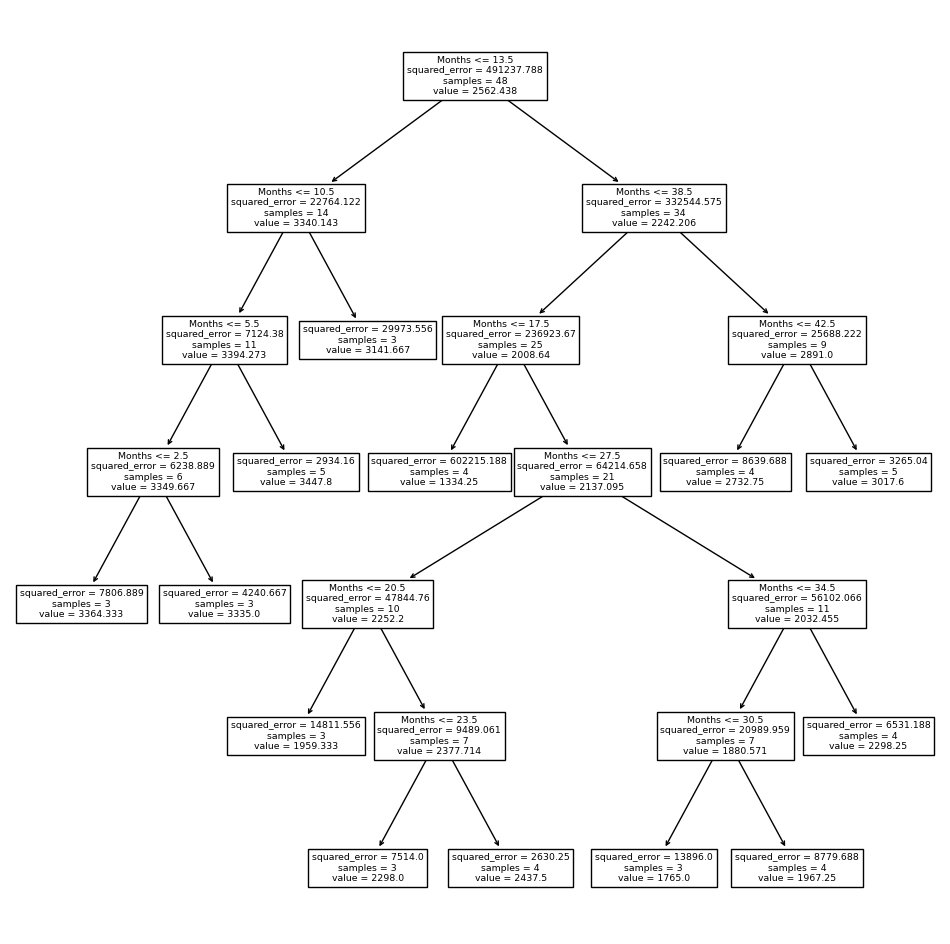

In [7]:
reg = DTR(min_samples_leaf=3)
reg.fit(X, y)
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);
#plt.savefig(fname="Lecture9-MRTFig1.pdf")

Plot the trend over time for the fitted tree

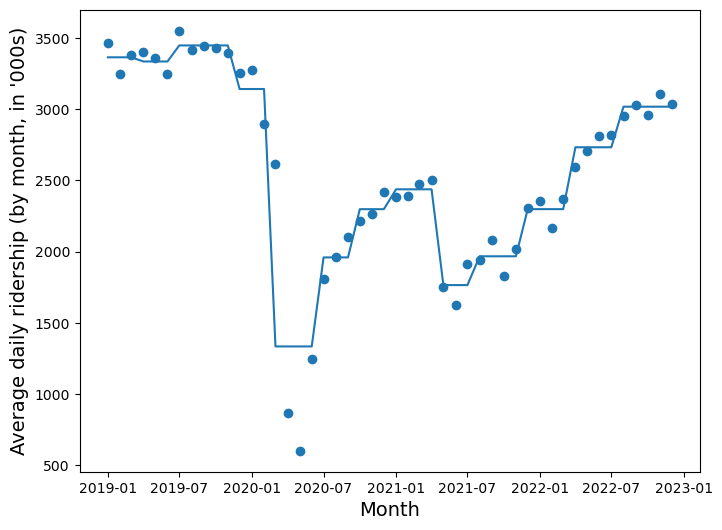

In [8]:
trend = reg.predict(X)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(MRT.index,MRT.Ridership)
plt.xlabel("Month",size=14)
plt.ylabel("Average daily ridership (by month, in '000s)",size=14)
ax.plot(MRT.index,trend)
#plt.savefig(fname="Lecture9-MRTFig2.pdf")
plt.show()

Now let's repeat the above analysis, with a bootstrap sample

In [9]:
np.random.seed(42)
sampled_indices = np.random.choice(X.index, size=len(X), replace=True)
Xb = X.loc[sampled_indices]
yb = y[sampled_indices]


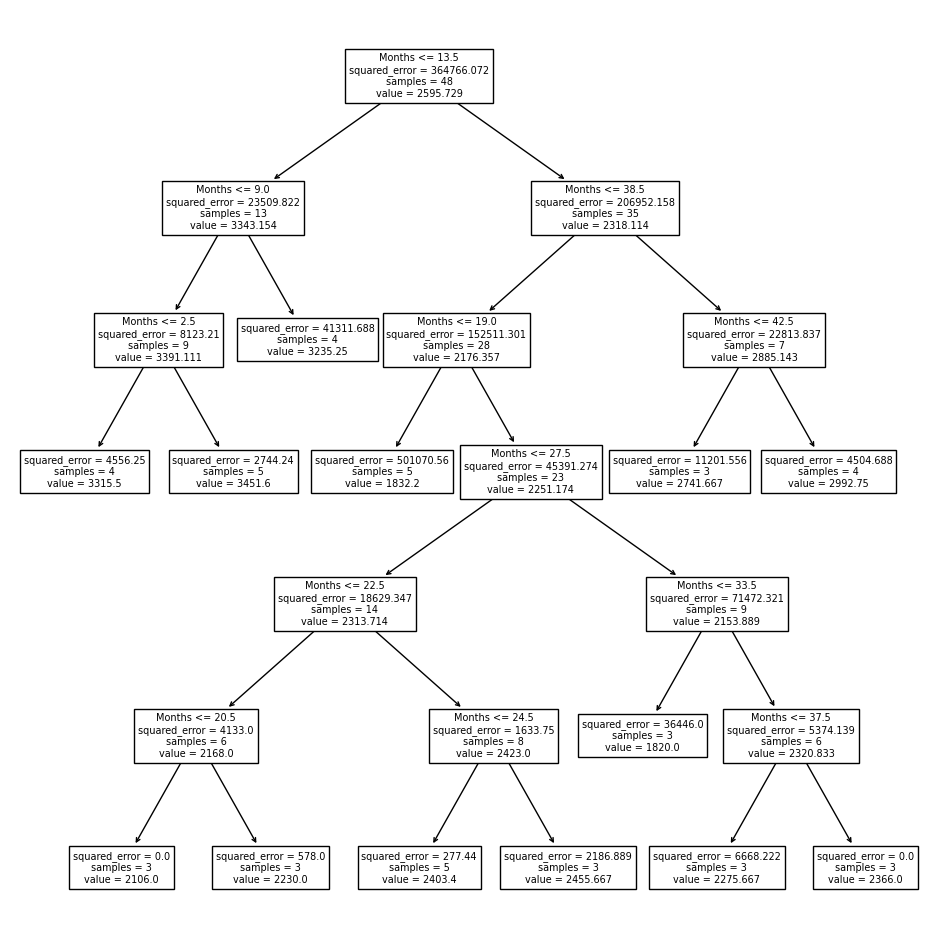

In [10]:
regb = DTR(min_samples_leaf=3)
regb.fit(Xb, yb)
ax = plt.subplots(figsize=(12,12))[1]
plot_tree(regb,
          feature_names=feature_names,
          ax=ax);
#plt.savefig(fname="Lecture9-MRTFig3.pdf")

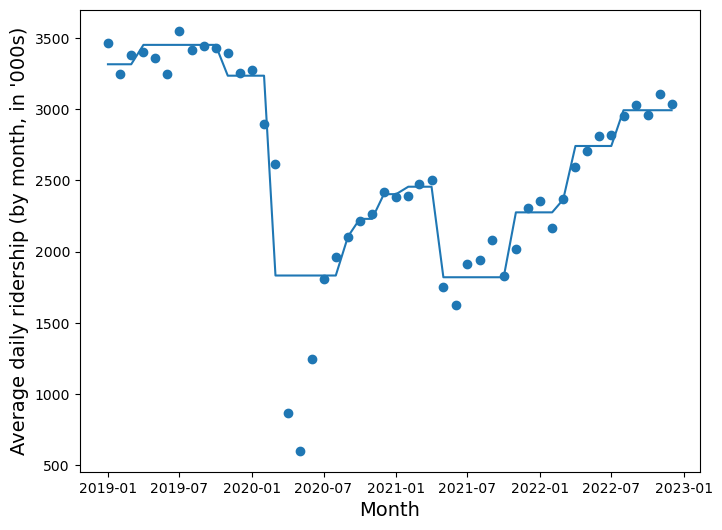

In [11]:
trend = regb.predict(X)
figb, axb = plt.subplots(figsize=(8,6))
axb.scatter(MRT.index,MRT.Ridership)
plt.xlabel("Month",size=14)
plt.ylabel("Average daily ridership (by month, in '000s)",size=14)
axb.plot(MRT.index,trend)
#plt.savefig(fname="Lecture9-MRTFig4.pdf")
plt.show()

Now let's use random forests with B=100

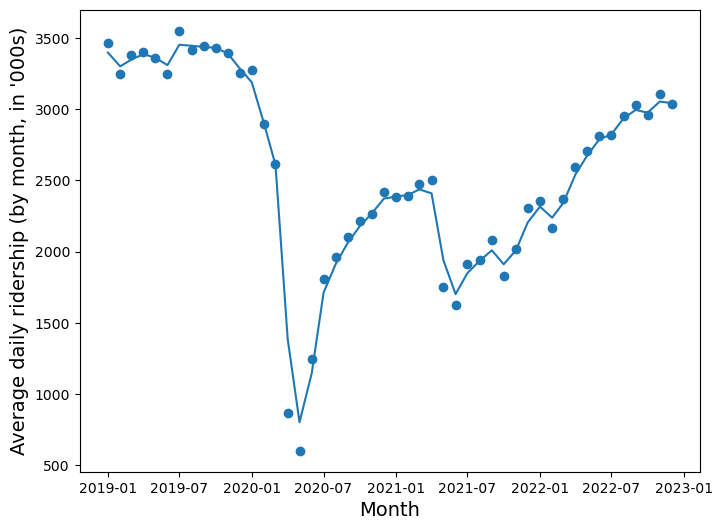

In [12]:
bag_MRT = RF(max_features=X.shape[1], random_state=0)
bag_MRT.fit(X,y)
trend = bag_MRT.predict(X)
figbag, axbag = plt.subplots(figsize=(8,6))
axbag.scatter(MRT.index,MRT.Ridership)
plt.xlabel("Month",size=14)
plt.ylabel("Average daily ridership (by month, in '000s)",size=14)
axbag.plot(MRT.index,trend)
#plt.savefig(fname="Lecture9-MRTFig6.pdf")
plt.show()


Random forests with B=20

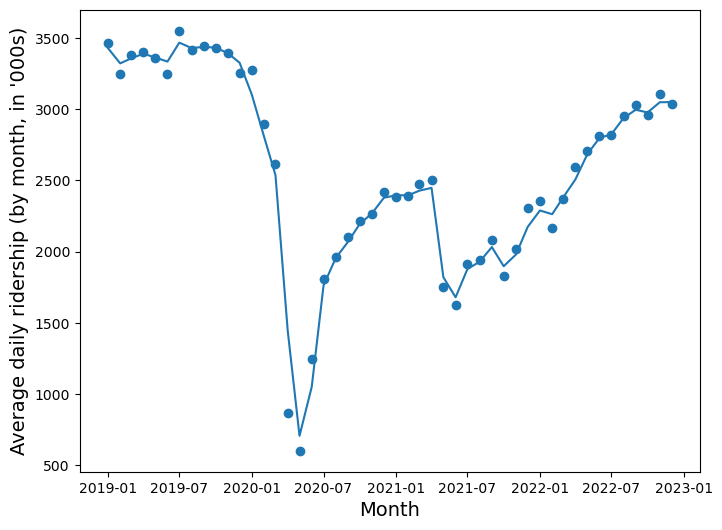

In [13]:
bag_MRT = RF(n_estimators=20, max_features=X.shape[1], random_state=0)
bag_MRT.fit(X,y)
trend = bag_MRT.predict(X)
figbag, axbag = plt.subplots(figsize=(8,6))
axbag.scatter(MRT.index,MRT.Ridership)
plt.xlabel("Month",size=14)
plt.ylabel("Average daily ridership (by month, in '000s)",size=14)
axbag.plot(MRT.index,trend)
#plt.savefig(fname="Lecture9-MRTFig5.pdf")
plt.show()